1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


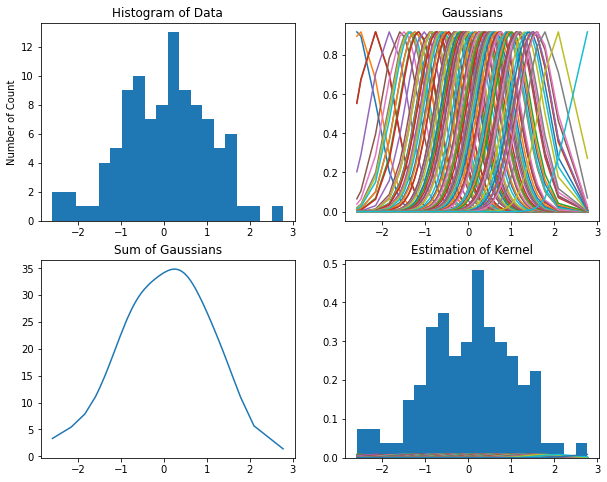

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 100
bin_num = 20
x = np.sort(np.random.randn(N))

fig,axis = plt.subplots(2,2,figsize = (10,8))
m = axis[0,0].hist(x, bin_num)
axis[0,0].set_title("Histogram of Data")
axis[0,0].set_ylabel("Number of Count")
stddev = 1.06 * np.std(x)*(x.size)**(-1/5)
gauss = np.zeros((100,100))
idx = 0

for i in x:
    gauss[idx,:]=(stats.norm(i,stddev).pdf(x))
    axis[0,1].plot(x,gauss[idx,:])
    idx += 1
axis[0,1].set_title("Gaussians")
gauss_sum = np.sum(gauss,axis = 1)

axis[1,0].plot(x,gauss_sum)
axis[1,0].set_title("Sum of Gaussians")
axis[1, 1].hist(x, bin_num, density = True);
area = sum(np.diff(x)*bin_num)
gauss = gauss/area
axis[1, 1].plot(x, gauss);
axis[1, 1].set_title('Estimation of Kernel');

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

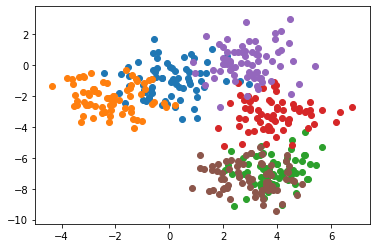

In [8]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

for i in range(0,6):
    x = np.random.normal(np.random.randint(-5,5), 1, 70)
    y = np.random.normal(np.random.randint(-10,5), 1, 70)
    plt.scatter(x,y)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

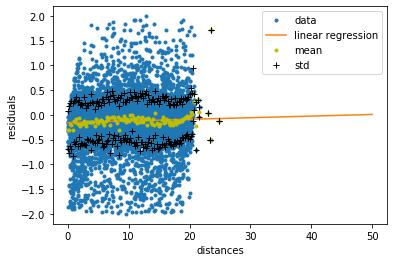

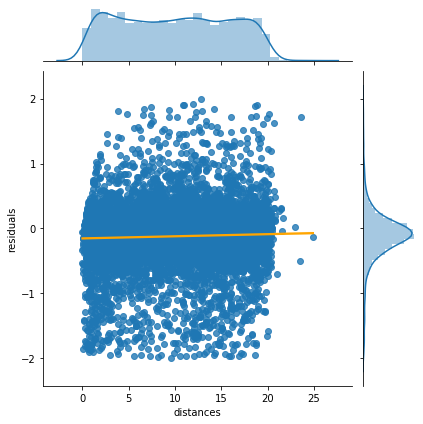

In [15]:
import pandas as pd
import seaborn as sns
import scipy

df = pd.DataFrame(np.load("/home/yukselcan/LaboratoryOfComputationalPhysics/residuals_261.npy", allow_pickle = True).item());
df = df[np.absolute(df["residuals"])<2]
x = np.arange(0, 50, 0.2);
y = np.zeros(250);
y_tilda = np.zeros(250);
t = 0;
for i in range(0, 250):
    tmp = df[(df['distances'] >= t)];
    tmp = tmp[tmp['distances'] < t + 0.2];
    y[i] = np.mean(tmp[['residuals']]);
    y_tilda[i] = np.std(tmp[['residuals']]);
    t += 0.2;
    
plt.plot(df['distances'], df['residuals'], '.', label = 'data');
linreg_results = stats.linregress(df['distances'], df['residuals']);
plt.plot(np.arange(0, 50, 0.01), np.arange(0, 50, 0.01) * linreg_results[0] + linreg_results[1], label = 'linear regression');
plt.plot(x, y, 'y.', label = 'mean');
plt.plot(x, y + y_tilda, '+', color = 'black', label = 'std');
plt.plot(x, y - y_tilda, '+', color = 'black');

plt.ylabel('residuals');
plt.xlabel('distances');
plt.legend();

sns.jointplot(x = 'distances', y = 'residuals', data = df, kind = 'reg', joint_kws = {'line_kws': {'color': 'orange'}});